# CS 254 Assignment 2

Before we start, please put your name in following format:

FirstName Lastname, netid //   e.g.) Safwan Wshah, swshah

To run your code:

*   Save your code to google drive, right click and open using google colab.
*   rename the assigmnent file to Yourfirstname_lastname_Assignment2.ipynb.
*   Under google drive root directory create the following folder and make sure all your assignments are under this directory (CS254/CS254-Assignments/yournetid-A#). For example, for assignment #2 it should look like this 
CS254/CS254-Assignments/swshah-A2



To submit, please follow the following steps:
*   Zip your assignment and name it yournetid-A#.zip For example for assignment 2, it should be swshah-A2.zip.
* Submit to blackboard. 



### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:

```
['yourfirst_last_name_Assignment_2.ipynb', 'data', 'img']
```

In [2]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS254/CS254-Assignments/asmith16-A2' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['data', 'img', 'andrew_smith_Assignment_2.ipynb']


# Part 1 - Linear Regression

In this assignment, we will build on the LinearRegression.ipynb to implement a linear regression with polynomial features and regularization. We will be expanding upon these ideas in the second half of this notebook. <b>Refer to the LinearRegression video for more detials - you can find it under the coding session of Module 2 . Please start from there before you start this assignment.</b>

First let us look at the dataset, the dataset is one variable that associate a pair of information (Diameter of Sand Granules Vs. Slope on Beach)

The data pairs are:

X = median diameter (mm) of granules of sand 
<br>
Y = gradient of beach slope in degrees

The data is from naturally occurring ocean beaches
<br>
Reference: Physical geography by A.M King, Oxford Press, England
<br>
<b>we need to implement a predication model to predict the beach slope in degrees from given granules of sand median diameter.</b>


<b>1)</b> In the first step, we must import the necessary python libraries. Numpy and Pandas contain array manipulation functions that will be helpful, while sklearn contains the functions we will use to do the heavy lifting with linear regression.

In [3]:
# importing modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

<strong>2)</strong> Load the data and store it in a pandas dataframe

In [4]:
path = GOOGLE_DRIVE_PATH + '/data/linearRegression.csv'
data = pd.read_csv(path, header=None, names=['GranulesDiameter', 'BeachSlope'])
#data.head(n=2)

<b>3)</b> Visualizing the data in tables and plot can help us better understand it. Summary statistics provided by describe() can provide additional information.

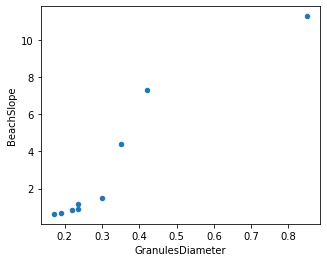

In [5]:
data.plot(kind='scatter', x='GranulesDiameter', y='BeachSlope', figsize=(5,4))

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. 

In [6]:
data.describe()

,GranulesDiameter,BeachSlope
count,9.000000,9.000000
mean,0.330000,3.186667
std,0.210698,3.789007
min,0.170000,0.630000
25%,0.220000,0.820000
50%,0.235000,1.150000
75%,0.350000,4.400000
max,0.850000,11.300000


<b>4)</b> Let's add a column of ones to the training set so we can use a vectorized solution to compute the cost and gradients. This ones column serves as x<sub>0</sub>, in the equation below, and allows us to take the dot product of the vectors <em>&#952;</em><sup>T</sup> and X<sup>i</sup>.
![alt_text](https://drive.google.com/uc?id=1Ajnjk1yMLYnbseX2O2j-zp_aeMFk8eEh)

In [7]:
#note that we add the ones to be first feature
data.insert(0, 'Ones', 1)
data

,Ones,GranulesDiameter,BeachSlope
0,1,0.170,0.63
1,1,0.190,0.70
2,1,0.220,0.82
3,1,0.235,0.88
4,1,0.235,1.15
5,1,0.300,1.50
6,1,0.350,4.40
7,1,0.420,7.30
8,1,0.850,11.30


<b>5)</b> Now let's initialize some variables. Please notice that we are going to use the vectorized version for our calculations. X contains all samples as described below, where m is the number of samples. <em>&#952;'s</em> size is n + 1 where n is the number of features and the " + 1" refer to the "ones" column that we added. Y is the regression output for each sample of m size. and &Ycirc; is the linear regression output. Note that for our data, we have the BeachSlope as the output and we have only one input feature, which is GranulesDiameter.

![alt_text](https://drive.google.com/uc?id=1L6dc7Fdnvm7etNE2qWjIWe-ShoxCoUhE)

In [8]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1] # iloc slicing function 
Y = data.iloc[:,cols-1:cols]

<b>6)</b> Let us vectorize our data, and create the matrix theta. We need to convert that data from DataFrame to numpy. Typically, numpy used for the calculations and pandas used to load data.

In [9]:
X = np.matrix(X)
Y = np.matrix(Y)
theta = np.matrix(np.array([0,0])).T
print ("X =", X)
print ("Y =", Y)
print ("theta =", theta)

X = [[1.         0.17      ]
 [1.         0.19      ]
 [1.         0.22      ]
 [1.         0.235     ]
 [1.         0.235     ]
 [1.         0.30000001]
 [1.         0.34999999]
 [1.         0.41999999]
 [1.         0.85000002]]
Y = [[ 0.63      ]
 [ 0.69999999]
 [ 0.81999999]
 [ 0.88      ]
 [ 1.14999998]
 [ 1.5       ]
 [ 4.4000001 ]
 [ 7.30000019]
 [11.30000019]]
theta = [[0]
 [0]]


<b>7) </b>Make sure X (training set), Y (target variables) and theta look correct and match the dimensions in cell 5 figure. X and Y should have the same number of rows, and there should be a theta value for each column in X.

In [10]:
X.shape, Y.shape, theta.shape

((9, 2), (9, 1), (2, 1))

<b>8)</b> We are going first to use scikit-learn's linear regression function before we code the linear regression algorithm from scratch.
<br>
http://scikit-learn.org/stable/

In [11]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = False)
model.fit(X, Y)
model.coef_ # get theta coefficients (model params)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([[-2.47592505, 17.1593689 ]])

<b>9)</b> Plot the data and the linear regression model (the line in this case) from sklearn 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Text(0.5, 1.0, 'Predicted Granules Sand Diameter vs. Beach Slope ')

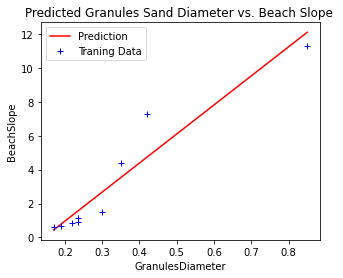

In [12]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x, f, color = "red", label='Prediction')
ax.plot(data.GranulesDiameter, data.BeachSlope, "r+",color = "blue", label='Traning Data')
#ax.scatter(data.GranulesDiameter, data.BeachSlope, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('GranulesDiameter')
ax.set_ylabel('BeachSlope')
ax.set_title('Predicted Granules Sand Diameter vs. Beach Slope ')

<b>10)</b> Now let's implement linear regression using gradient descent to minimize the cost function. 

First we'll create a function to compute the cost of a given solution (characterized by the parameters theta). Please note that we are going to use the vectorized version.

![alt_text](https://drive.google.com/uc?id=12Xa6V0IByZPsVKfPkxfbw-axTunlWm0H)

In [13]:
def calcVectorizedCost(X, Y, theta):
    inner = np.dot(((X * theta) - Y).T, (X * theta) - Y)
    return inner / (2 * len(X))

Now let's compute the cost for our initial solution (0 values for theta).

In [14]:
calcVectorizedCost(X, Y, theta)

matrix([[11.45812266]])

<b>11)</b> Now we will write our own gradient descent algorithm, note that we are going to implement it in Vectorized form.
![alt_text](https://drive.google.com/uc?id=1rB6vQrybeeM__QYLXlYeyGRmOVpJUgAj)

In [15]:
def gradientDescent(X, Y, theta, eta, iters):
    
    """
    Performs gradient descent optimization on a set of data
    
    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    eta: learning rate (step size)
    iters: number of times to iterate the algorithm (epochs)
    output: return optimized theta and the cost array for each iteration (epoch). 
    """
    cost = np.zeros(iters)
    
    for i in range(iters):
        gradients = 2 * (np.dot(X.T, ((np.dot(X, theta))) - Y)/ (len(X)))
        theta = theta - eta * gradients
        cost[i] = calcVectorizedCost(X, Y, theta)
    return theta, cost


Initialize some additional variables - the learning rate alpha, and the number of iterations to perform. Note that these are hyperparameters, which means you need to try those manually to find the right values. You can change those and try to see the effect. we are looking for faster convergance with lowest number of iterations. You can also define your own stop criteria, such as reaching a particular cost threshold.

In [16]:
eta = 0.5
iters = 1000

<b>12)</b> Now let's run the gradient descent algorithm to fit our parameters theta to the training set. Note that we achieved same results as the scikit-learn's library. Note that linear regression is a convex function and we should reach almost same answer (the global minimum)

In [17]:
optTheta, cost = gradientDescent(X, Y, theta, eta, iters)
print (optTheta)

[[-2.47592505]
 [17.1593689 ]]


<b>13)</b> Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [18]:
calcVectorizedCost(X, Y, optTheta)

matrix([[0.57115739]])

<b>14)</b> Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Granules Sand Diameter vs. Beach Slope ')

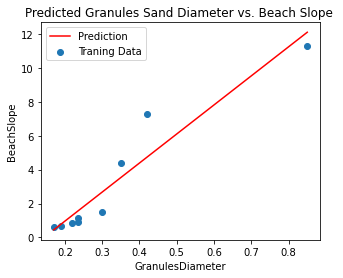

In [19]:
x = np.linspace(data.GranulesDiameter.min(), data.GranulesDiameter.max(), 100)

f = optTheta[0, 0] + (optTheta[1, 0] * x)

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.GranulesDiameter, data.BeachSlope, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('GranulesDiameter')
ax.set_ylabel('BeachSlope')
ax.set_title('Predicted Granules Sand Diameter vs. Beach Slope ')

Since we designed our gradient decent function to output a vector with the cost at each training iteration, we can plot that as well. Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

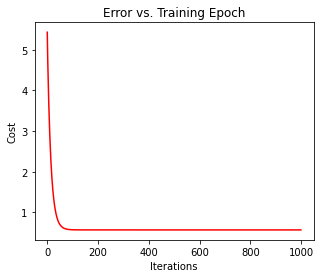

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Assignment 2 Questions
Now it is your turn to apply some of the regression concepts covered in class. Below we will be first transforming our features with PolynomialFeatures from sklearn. Once we have done this transformation, you will then fit this new data. Once the data is fit, we will analyze the effects of regularization on our new polynomial fit. Each Question is worth <b>12 Points for each </b> + 2 extra points .

<Strong>Q1)</Strong> Import PolynomialFeatures from sklearn. You will need to create a PolynomialFeatures object <b>(with the degree hyperparam set to 5)</b> which we will denote as the variable "poly". Then you need to transform your data using the object that you've created. Use the docs to assist you with understanding and implementing https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
Note: please note that we are going to apply polynomials only on the features without the added column of ones as the sklearn PolynomialFeatures doesn't expect the "one" feature. Also, the PolynomialFeatures will automatically adds a "ones" column to the output transformed X (No need to add "ones" after you transform using sklearn PolynomialFeatures).

In [21]:
def GeneratePolynomialFeatures(X, polydegree):  
    # create sklearn PolynomialFeatures Object with degree=polydegree
    poly = PolynomialFeatures(polydegree)
    # This is the new generated features. 
    polynomial_x = poly.fit_transform(X)
    return polynomial_x

This is a test function with Sanity check to the GeneratePolynomialFeatures function

In [22]:
X = data.iloc[:,1:cols-1] #removing the ones column from X
polydegree = 5
polynomial_x = GeneratePolynomialFeatures(X, polydegree)
print (polynomial_x.shape)
# Sanity check: make sure that your polynomial_x shape is (9, 6) for polydegree equal 5

(9, 6)


<Strong>Q2)</Strong> What does PolynomialFeatures allow us to do to our data? Why might we want to make this transformation? 

In [23]:
# Write your response here
# PolynomialFeatures does a few things for the user that are crucial for regularization. Automatically adding the ones column along with
# adding the data set matrix X the new columns and values for the polynomial transformation by taking the degree given,
# rasing each data value to the power given and then all taking the interactions between the features
# for a single row of the data (9,6) turns into:
# [1, x1, x2, x1^5, x2^5, x1 * x2]

<Strong>Q3)</Strong> Let's perform gradient descent with our new data. Fill in values for thetaInit, eta (use 0.25), and epochs (use 500,000). This may take some time to run because we are performing a large number of iterations. 
Note: call the gradientDescent implemented above.

In [24]:
# def gradientDescent(X, Y, theta, eta, iters):

In [25]:
# theta initialization, make sure its (n + 1) x 1 where n is the number of features,
thetaInit = np.matrix(np.array([0,0,0,0,0,0])).T
# print(polynomial_x.shape)
# print(Y.shape)
# print(thetaInit.shape)
# print(thetaInit)
# in this case feature has been increased after applying the polynomial fucntion.
eta = 0.25
epochs = 100000  # default val was 100000
theta, losses = gradientDescent(polynomial_x, Y, thetaInit, eta, epochs)

In [26]:
print (losses[-1])
print (theta.shape)

#you should get losses[-1] equal to 0.12419223544505743 and theta.shape to be (6, 1)

0.12419223544505753
(6, 1)


This function will plot the data and the nonlinear regression output. 

In [27]:
def plot_SimpleNonlinearRegression_line(theta, X, poly):

    """
    Plotting regression line for nonlinear regression
    theta: current weights (coefficients) for regression
    x: independent variable
    poly: the sklearn polynomialfeatures object being used to perform regression
    """
    
    # find min and max values
    min_x = np.min(X)
    max_x = np.max(X)
    # get range of data to transform and make predictions on
    min_max_range = np.linspace(min_x, max_x, 100)
    polynomial_min_max_range = poly.fit_transform(min_max_range)
    y_vals = np.dot(polynomial_min_max_range, theta)
    plt.plot(min_max_range, y_vals)

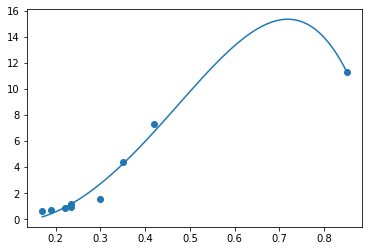

In [28]:
# plot of data and regression line
poly = PolynomialFeatures(polydegree) # if you want to change the polydegree you have to change it in Q1 cell first.
plt.scatter(data.GranulesDiameter, data.BeachSlope, label='Traning Data')
plot_SimpleNonlinearRegression_line(theta, X, poly)

Output shoud look like this 


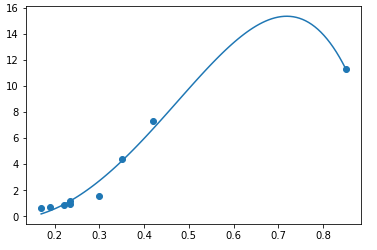

<Strong>Q4)</Strong> Do you think this nonlinear regression is a good fit for you data compared to the linear model above? Why? Do you believe we end up with overfitting? Suggest a way to reduce the overfitting, if it exists (no code needed).

In [29]:
# Write your response here
# Having run this data multiple times over a number of different epochs, (50000, 100000, 500000, 1000000). No, I do not believe this to be over fit, This becomes very clear when looking at the same data with an epoch of a million. Since its 10x the original epoch val it give a good idea on,
# how much more the line can be turned and specifically with the first few values when the epoch is that high it is clearly over fit where as here it just seems to be a fairly well balanced output. 
# Where as 

<Strong>Q5)</Strong> Run the code below to check on the model behavior for different polynomials (2,3, 5,10,20). Comment on the generated figure. 

Poly Degree: 2
Theta shape: (3, 1)
X shape: (9, 3)
Y shape: (9, 1)
Poly Degree: 3
Theta shape: (4, 1)
X shape: (9, 4)
Y shape: (9, 1)
Poly Degree: 5
Theta shape: (6, 1)
X shape: (9, 6)
Y shape: (9, 1)
Poly Degree: 10
Theta shape: (11, 1)
X shape: (9, 11)
Y shape: (9, 1)
Poly Degree: 20
Theta shape: (21, 1)
X shape: (9, 21)
Y shape: (9, 1)


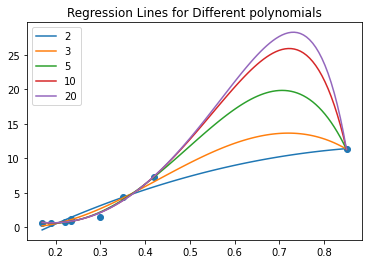

In [30]:
# Hyperparam initialization

eta = 0.25
epochs = 500000 # This will take a while but you can set it to 10000.
Poly_degree_values = [2, 3, 5, 10, 20]

# Initializing plot
plt.title("Regression Lines for Different polynomials")
plt.scatter(data.GranulesDiameter, data.BeachSlope, label='Traning Data')

# iterating over different alpha values (This is going to take a while)
for i in Poly_degree_values:
    print("Poly Degree: " + str(i))

    polynomial_x  = GeneratePolynomialFeatures(X, i)
    thetaInit = np.zeros((polynomial_x.shape[1],1))

    print("Theta shape: " + str(thetaInit.shape))
    print("X shape: " + str(polynomial_x.shape))
    print("Y shape: " + str(Y.shape))

    theta, losses = gradientDescent(polynomial_x, Y, thetaInit, eta, epochs)
    poly = PolynomialFeatures(i)
    plot_SimpleNonlinearRegression_line(theta, X, poly)
    
plt.legend(Poly_degree_values)
plt.show()

Output should look like this ...

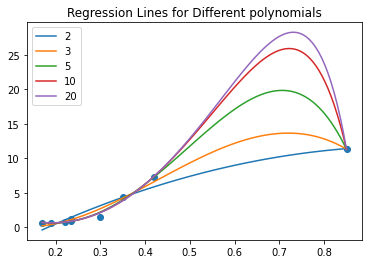

In [31]:
# Write your response here
# As far as the polynomial value is concerned for this data 20 is clearly to high and even 10 seems to be on the side of over fitting. Any where from 2 to 5 
# seems to be the money area however with out the data points in the middle or more math being done it is imposible to say for sure which of the 3 left would be best. 


<Strong>Q6)</Strong> In this question we need to add the Ridge regularization term to the gradient descent algorithm. Finish the calcVectorizedCostR and the gradientDescentR functions to do so. Make sure to add the proper ridge regularization terms. Also, check your notes on ridge regression regularization. The general vectorized form equation for regularized linear regression is provided below.


![alt_text](https://drive.google.com/uc?id=1V4NZDTburrE6MuHsuuIpRWSkgfVY2Auq)


Q6-a) Do you need to update the cost function when you use regularization? Why or why not?

In [32]:
# Write your response here
# In slide 29 of linear regression slides about ridge regression, the cost function is J(theta) while MSE is the cost function without the
# regularization additions. theta(0) is not regularized however.

In [33]:
def calcVectorizedCostR(X, Y, theta, alpha):
    
    """
    Caculating cost metric as mean squared error (MSE) with regularization
    
    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    alpha: regularization term
    output: 
    """
    # Add your code here 
    # grabbed cost function from earlier in the project to add the Ridge Regularization part

    # vectorized cost function part (calcs cost for each theta value)
    cost = (np.dot((X*theta - Y).T, (X*theta - Y))) 
    return cost / (2*len(X)) + 0.5 * alpha * (theta**2)
    
def gradientDescentR(X, Y, theta, eta, iters, alpha):
    
    """
    Caculating gradients and updating thetas through gradient descent loop with regularization
    
    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    eta: learning rate
    iters: number of epochs for updating theta
    alpha: regularization term
    output: updated theta values array and the cost array for each iteration
    """
    cost = np.zeros(iters)
    
    for i in range(iters):
        
        thetaTemp = theta.copy()
        thetaTemp[0] = 0
        # running the version of calcVectorizedCostR that has the regularization in it
        gradients = (2/len(X)) * (np.dot(X.T, (np.dot(X,theta) - Y))) + alpha * theta
        
        # if theta zero ignore the alpha part... 
        theta = theta - eta * gradients
        cost[i] = calcVectorizedCost(X, Y, theta)
    return theta, cost

<Strong>Q7)</Strong> Explain the observed regularization effect if you try different regularization values as shown in the code below. You can also play with polydegree below to check on the regularization effect. What do you observe if you have a large polydegree (50)? Can the regularization help? 

The code below also serve as test function for gradientDescentR and calcVectorizedCostR.

(9, 51)
(51, 1)
(9, 1)


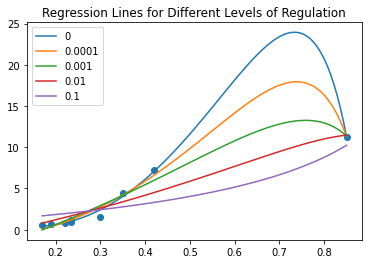

In [34]:
# Hyperparam initialization

eta = 0.25
epochs = 100000
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1]

# Initializing plot
plt.title("Regression Lines for Different Levels of Regulation")
plt.scatter(data.GranulesDiameter, data.BeachSlope, label='Traning Data')

#polydegree = 5
polydegree = 50
polynomial_x = GeneratePolynomialFeatures(X, polydegree)

poly = PolynomialFeatures(polydegree)
thetaInit = np.zeros((polynomial_x.shape[1],1)) 

print(polynomial_x.shape)
print(thetaInit.shape)
print(Y.shape)

# iterating over different alpha values (This is going to take a while)
for i in alpha_values:
    theta, losses = gradientDescentR(polynomial_x, Y, thetaInit, eta, epochs, i)
    plot_SimpleNonlinearRegression_line(theta, X, poly)
    
plt.legend(alpha_values)
plt.show()

Output should look like this ...


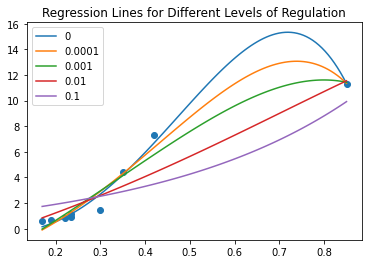

In [ ]:
# Write your response here
# Increasing from poly 5 to poly 50 just how effective regularization is as the peaks are much more agressive and pointed in polynomial 50. 
# as the value of the regularization lowers it returns to being more overfit as it was when the value was 0. 
# the higher the value of regularization the more aggressive it is in removing the curves you see in a more overfit non regularized model.

<Strong>Q8)</Strong> Which regularization value produces the best fit? Why?

In [ ]:
# Write your response here
# values between 0.01 and 0.001 would probably be the best value for this model as the 0.1 is way over aggressive and the accuracy would suffer
# where as 0.0001 would not do enough and the model could still be to close or still be overfit.